# 十三.基于灰度三维图的图像顶帽运算和黑帽运算

前面的文章讲解过图形形态学变换——顶帽运算和黑帽运算，本篇文章继续深入，结合灰度三维图像讲解图像顶帽运算和图像黑帽运算

1.图像顶帽运算

2.图像黑帽运算

3.基于灰度三维图的顶帽黑帽运算


## 13.1基于灰度三维图的顶帽黑帽运算

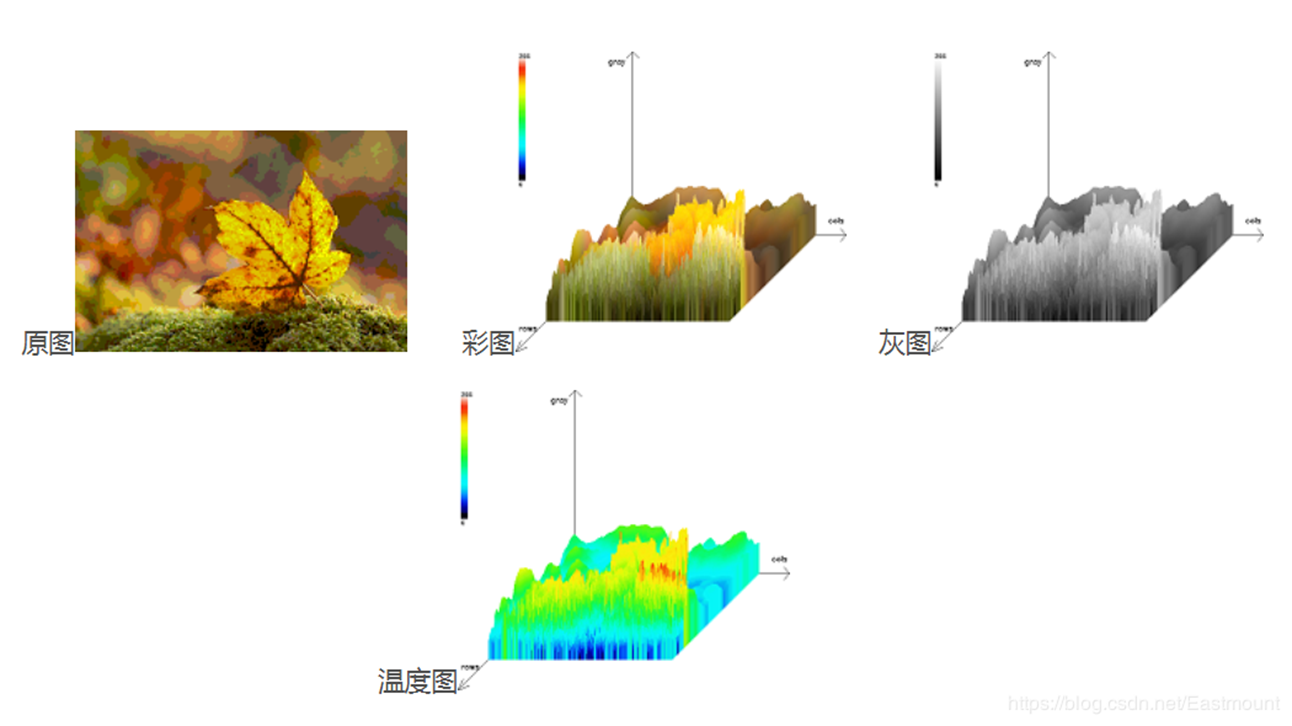

在第十章已经学习过图像顶帽和黑帽运算，这里不在论述，具体可参考第十章

为什么图像顶帽运算会消除光照不均匀的效果呢？通常可以利用灰度三维图来进行解释该算法。灰度三维图主要调用Axes3D包实现


原图绘制灰度三维图的代码如下


C:\Users\g1757\Anaconda3\envs\torch16_gpu\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


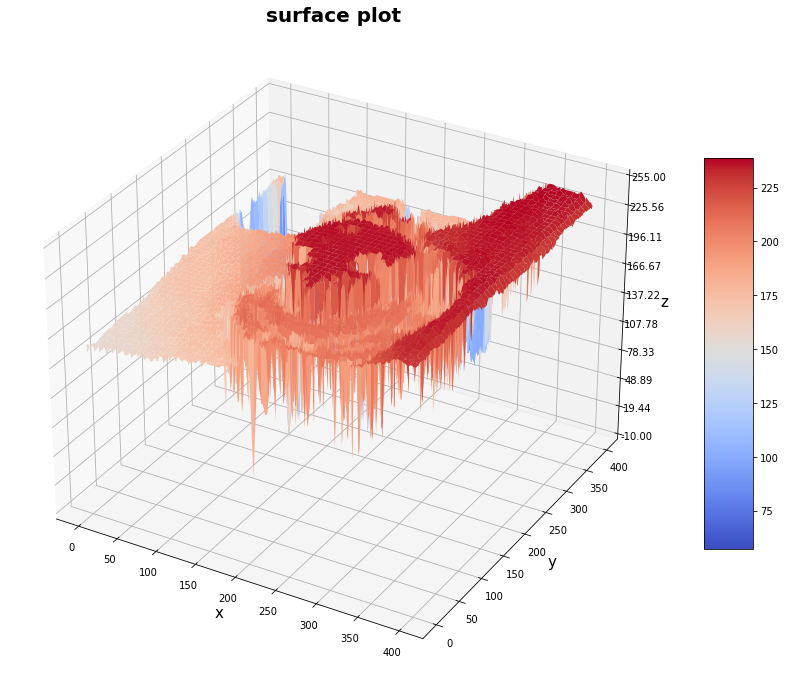

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#读取图像
img = cv.imread("test.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
imgd = np.array(img)      #image类转numpy

#准备数据
sp = img.shape
h = int(sp[0])        #图像高度(rows)
w = int(sp[1])       #图像宽度(colums) of image

#绘图初始处理
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection="3d")

x = np.arange(0, w, 1)
y = np.arange(0, h, 1)
x, y = np.meshgrid(x,y)
z = imgd
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm)  

#自定义z轴
ax.set_zlim(-10, 255)
ax.zaxis.set_major_locator(LinearLocator(10))   #设置z轴网格线的疏密
#将z的value字符串转为float并保留2位小数
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) 

# 设置坐标轴的label和标题
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.set_zlabel('z', size=15)
ax.set_title("surface plot", weight='bold', size=20)

#添加右侧的色卡条
fig.colorbar(surf, shrink=0.6, aspect=8)  
plt.show()


从图像中的像素走势显示了该图受各部分光照不均匀的影响，从而造成背景灰度不均现象，其中凹陷对应图像中灰度值比较小的区域。而通过图像白帽运算后的图像灰度三维图的代码如下：

C:\Users\g1757\Anaconda3\envs\torch16_gpu\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().


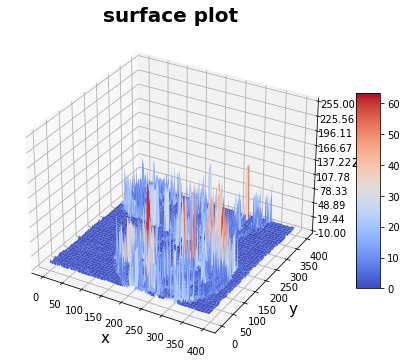

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

#读取图像
img = cv.imread("test.jpg")
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

#图像黑帽运算
kernel = np.ones((10,10), np.uint8)
result = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)

#image类转numpy
imgd = np.array(result)     

#准备数据
sp = result.shape
h = int(sp[0])        #图像高度(rows)
w = int(sp[1])       #图像宽度(colums) of image

#绘图初始处理
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection="3d")

x = np.arange(0, w, 1)
y = np.arange(0, h, 1)
x, y = np.meshgrid(x,y)
z = imgd
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm)  

#自定义z轴
ax.set_zlim(-10, 255)
ax.zaxis.set_major_locator(LinearLocator(10))   #设置z轴网格线的疏密
#将z的value字符串转为float并保留2位小数
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f')) 

# 设置坐标轴的label和标题
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.set_zlabel('z', size=15)
ax.set_title("surface plot", weight='bold', size=20)

#添加右侧的色卡条
fig.colorbar(surf, shrink=0.6, aspect=8)  
plt.show()


效果图如上所示，
对应的灰度
更集中于10至100区间，
由此证明了
不均匀的背景被大致消除了，
有利于后续的阈值
分割或图像分割。
